1.1.Ví dụ 1. Nhắc lại ví dụ ở bài lý thuyết: \
Trong ví dụ này, chúng ta sử dụng dữ liệu là thông tin về chỉ số mua sắm và mức thu nhập có trong tệp
dữ liệu shopping-data.csv. Tệp dữ liệu có 4 trường nhưng ta chỉ sử dụng 2 trường liên quan tới thu nhập
và chỉ số mua sắm để tìm tương quan, các trường khác chỉ chứa thông tin ID nên ta bỏ qua.\
Trong phần này ta sẽ sử dụng thư viện scikit-learn (sklearn) để thực hiện mô hình.\
Các bước sẽ như sau:\
(i) Đọc dữ liệu vào, chuẩn hóa (chú ý trong phần lý thuyết ta đã biết nếu kỳ vọng của các phân bố
Gaussian là 0 thì tính toán sẽ tốt hơn); Ở trong code ta sẽ in ra một số thông tin của dữ liệu để
xem đọc có đúng không.\
(ii) Khởi tạo đối tượng của lớp mô hình trộn Gaussian thông qua hàm dựng\
gm = GaussianMixture(n_components=K, covariance_type='full', random_state=0)\
Ở đây số cụm được chia sẽ là n_component = K\
(iii) Sau đó ta khớp dữ liệu của ta bằng đối tượng mô hình vừa tạo:\
gm. fit(X_DATA)\
(iv) Chúng ta vẽ dữ liệu ra dạng trực quan để có thể quan sát.\
(v) Ở trong code dưới đây, chúng ta bổ sung thêm phần tìm xem K (số cụm nên dùng để chia dữ liệu)
bao nhiêu là hợp lý nhất. Các làm của chúng ta ở đây đơn giản chỉ là thử với một dãy các giá trị
số cụm, giá trị nào cho kết quả tốt nhất (trong số đó) thì sử dụng.

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from matplotlib.patches import Ellipse
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
# Thư viện chứa model Gaussian Mixture

In [54]:
data = pd.read_csv("../week12/shopping-data.csv", header=0, index_col=0)
print(data.shape)
data.head()
# Lấy ra thu nhập va điểm shopping
X = data.iloc[:, 2:4].values

(200, 4)


In [55]:
# Chuẩn hoá dữ liệu
std = MinMaxScaler()
X_std = std.fit_transform(X)
print(X_std.shape)

(200, 2)


In [56]:
# Khởi tạo đối tượng mô hình GaussianMixture
gm = GaussianMixture(n_components=5,
covariance_type='full',
random_state=0)

gm.fit(X_std)
print('means: \n', gm.means_)
print('covariances: \n ', gm.covariances_)

means: 
 [[0.60502531 0.15433196]
 [0.33368985 0.49394756]
 [0.58393969 0.82673863]
 [0.0829305  0.80743088]
 [0.09861098 0.21597752]]
covariances: 
  [[[ 0.01818446  0.00433814]
  [ 0.00433814  0.00873064]]

 [[ 0.00613567 -0.00231927]
  [-0.00231927  0.0051635 ]]

 [[ 0.01808598 -0.00031096]
  [-0.00031096  0.0091568 ]]

 [[ 0.00337483 -0.0001437 ]
  [-0.0001437   0.01026088]]

 [[ 0.00453005  0.00255303]
  [ 0.00255303  0.01918353]]]


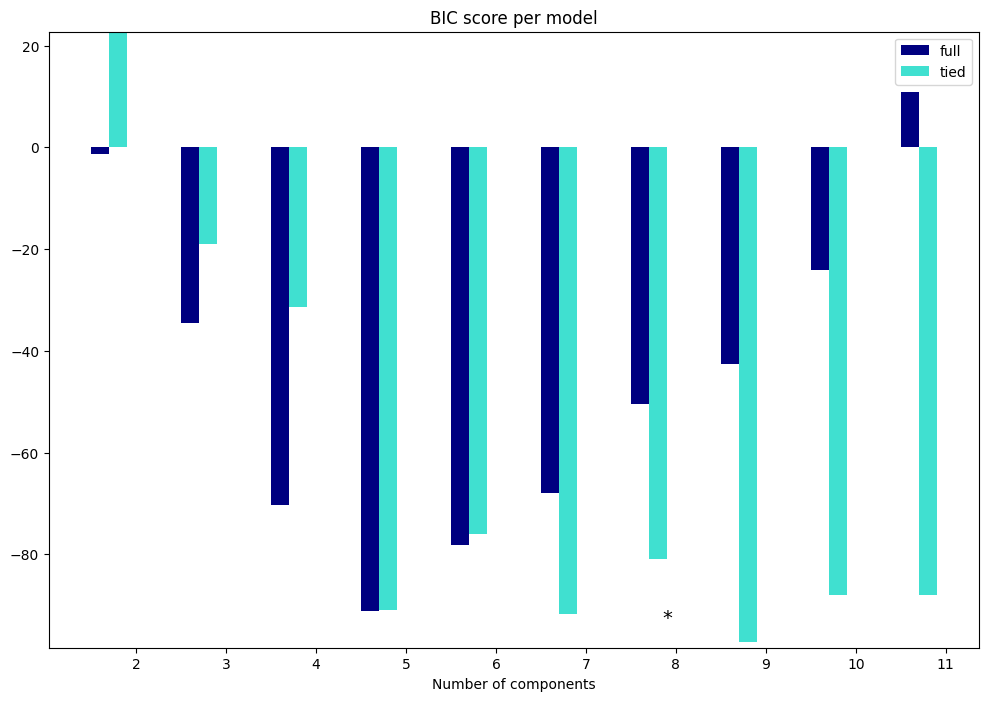

In [57]:
lowest_bic = np.infty
bic = []
n_components_range = range(2, 12)
# cv_types = ['spherical', 'tied', 'diag', 'full']
cv_types = ['full', 'tied']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit Gaussian mixture theo phương pháp huấn luyện EM
        gmm = GaussianMixture(n_components=n_components,
        covariance_type=cv_type)
        gmm.fit(X_std)
        bic.append(gmm.bic(X_std))
        # Gán model có BIC scores thấp nhất là model tốt nhất
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise'])
clf = best_gmm
bars = []
# Vẽ biểu đồ BIC scores
plt.figure(figsize=(12, 8))
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
        (i + 1) * len(n_components_range)],width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +.2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xlabel('Number of components')
plt.legend([b[0] for b in bars], cv_types)

In [58]:
best_gmm

GaussianMixture(covariance_type='tied', n_components=9)

C:\Users\d\AppData\Local\Temp\ipykernel_22544\3384719534.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[labels.astype(np.int)])


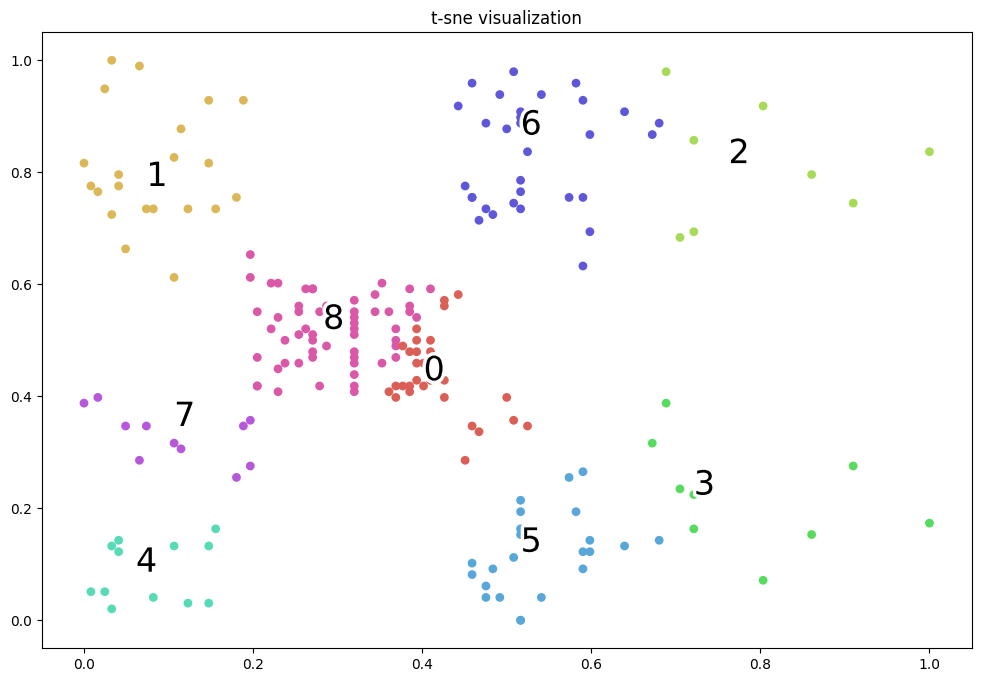

In [59]:
def _plot_kmean_scatter(X, labels):
    '''
    X: dữ liệu đầu vào
    labels: nhãn dự báo
    '''
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    # vẽ biểu đồ scatter
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[labels.astype(np.int)])

    # thêm nhãn cho mỗi cluster
    txts = []

    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        xtext, ytext = np.median(X[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.title('t-sne visualization')

labels = best_gmm.predict(X_std)
_plot_kmean_scatter(X_std, labels)

1.2.Ví dụ mở rộng. Trong ví dụ này chúng ta sử dụng dữ liệu cho trong tệp đính kèm

Sales_Transactions_Dataset_Weekly.csv hoặc tại link https://archive.ics.uci.edu/ml/machine-
learning-databases/00396/ .

Mô tả dữ liệu: Dữ liệu chứa thông tin giao dịch bán hàng của 819 mã sản phẩm (Product ID) trong
819 dòng dữ liệu. Mỗi mã được đặc trưng bởi các thông tin: Mã (cột đầu); lượng giao dịch trong 52
tuần (week 0 – week 51), sau đó có thông tin chuẩn hóa của giao dịch các tuần (ta sử dụng thông tin
này hoặc thông tin theo tuần – chỉ chọn 1 trong 2).
Yêu cầu: Hãy dựa vào ví dụ 1, mở rộng áp dụng với dữ liệu trên đây. Biết rằng số cụm tối ưu sẽ nằm
trong khoảng từ 5 đến 15, hãy xác định số cụm và sau đó phân các mã sản phẩm thành các cụm dựa
trên tiêu chí lượng giao dịch đã cho trong dữ liệu.

In [60]:
data = pd.read_csv("../week12/Sales_Transactions_Dataset_Weekly.csv", header=0, index_col=0)
print(data.shape)
# Chọn cột dữ liệu cần phân tích (lượng giao dịch)
cols = [f"Normalized {i}" for i in range(52)]
X = data[cols]

(811, 106)


In [61]:
# Chuẩn hoá dữ liệu
std = MinMaxScaler()
X_std = std.fit_transform(X)
print(X_std.shape)

(811, 52)


In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_std = pca.fit_transform(X_std)
X_std = pd.DataFrame(X_std)
print(X.shape)

(811, 52)


In [63]:
# Khởi tạo đối tượng mô hình GaussianMixture
gm = GaussianMixture(n_components=5,
covariance_type='full',
random_state=0)

gm.fit(X_std)
print('means: \n', gm.means_)
print('covariances: \n ', gm.covariances_)

means: 
 [[ 1.22449007  0.14828329]
 [-0.70756265  0.14388899]
 [ 0.11877534  0.34418635]
 [-1.34314168 -0.33155052]
 [ 1.6983827  -0.35635955]]
covariances: 
  [[[ 0.13170473 -0.01214057]
  [-0.01214057  0.11026427]]

 [[ 0.08393408 -0.0213462 ]
  [-0.0213462   0.14595772]]

 [[ 0.12446626  0.00016348]
  [ 0.00016348  0.12259095]]

 [[ 0.10893241  0.00219371]
  [ 0.00219371  0.0892541 ]]

 [[ 0.05411186 -0.00911332]
  [-0.00911332  0.06042571]]]


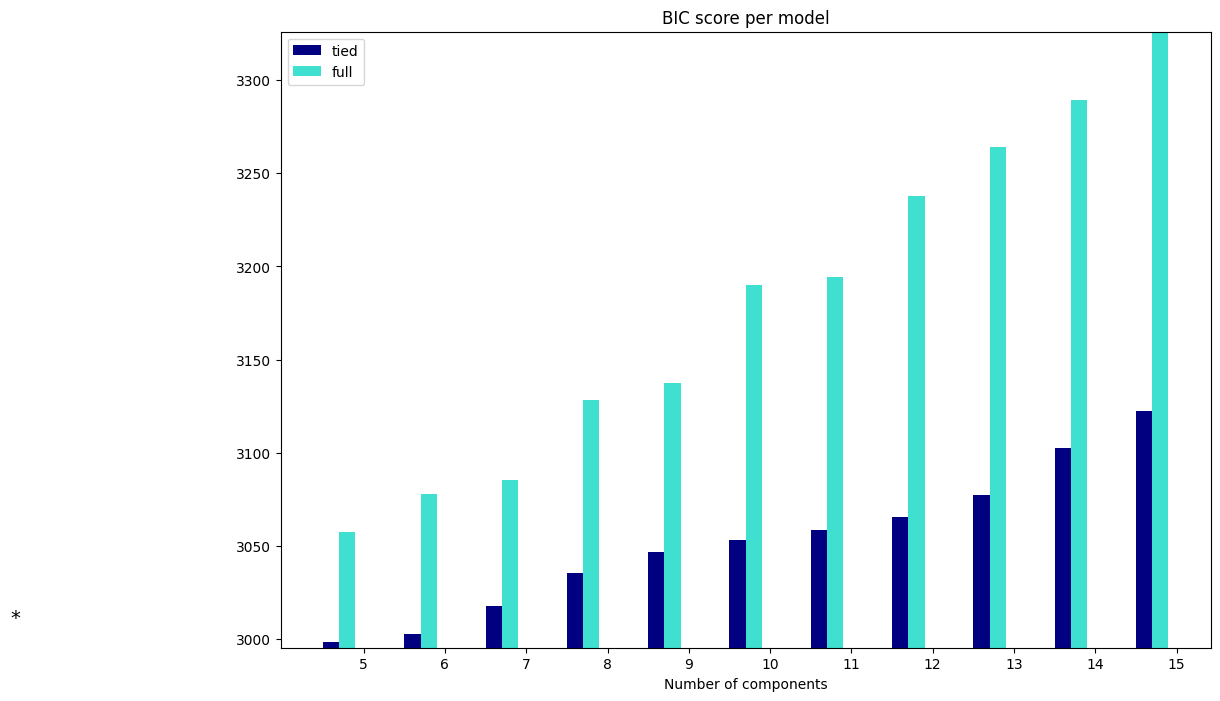

In [64]:
# Xác định số lượng cụm sử dụng mô hình GMM và phương pháp BIC
lowest_bic = np.infty
bic = []
n_components_range = range(5, 16)
cv_types = ['tied','full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Luyện mô hình
        gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X_std)
        bic.append(gmm.bic(X_std))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

# Số lượng cụm tốt nhất
n_components = best_gmm.n_components
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise'])
clf = best_gmm
bars = []
# Vẽ biểu đồ BIC scores
plt.figure(figsize=(12, 8))
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
        (i + 1) * len(n_components_range)],width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +.2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xlabel('Number of components')
plt.legend([b[0] for b in bars], cv_types)

In [65]:
# Luyện mô hình GMM với số lượng cụm tốt nhất
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X_std)

# Gán nhãn các mã sản phẩm vào các nhóm cụm tương ứng
labels = gmm.predict(X_std)
data["cluster"] = labels
print(data.head())

              W0  W1  W2  W3  W4  W5  W6  W7  W8  W9  ...  Normalized 43   
Product_Code                                          ...                  
P1            11  12  10   8  13  12  14  21   6  14  ...           0.22  \
P2             7   6   3   2   7   1   6   3   3   3  ...           0.40   
P3             7  11   8   9  10   8   7  13  12   6  ...           1.00   
P4            12   8  13   5   9   6   9  13  13  11  ...           0.47   
P5             8   5  13  11   6   7   9  14   9   9  ...           0.53   

              Normalized 44  Normalized 45  Normalized 46  Normalized 47   
Product_Code                                                               
P1                     0.28           0.39           0.50           0.00  \
P2                     0.50           0.10           0.10           0.40   
P3                     0.18           0.18           0.36           0.45   
P4                     0.06           0.12           0.24           0.35   
P5         

c:\Users\d\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\d\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\d\AppData\Local\Temp\ipykernel_22544\1318199647.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(X[:, 0], X[:, 1], lw=0, s=40, c=palette[labels.astype(np.int)])


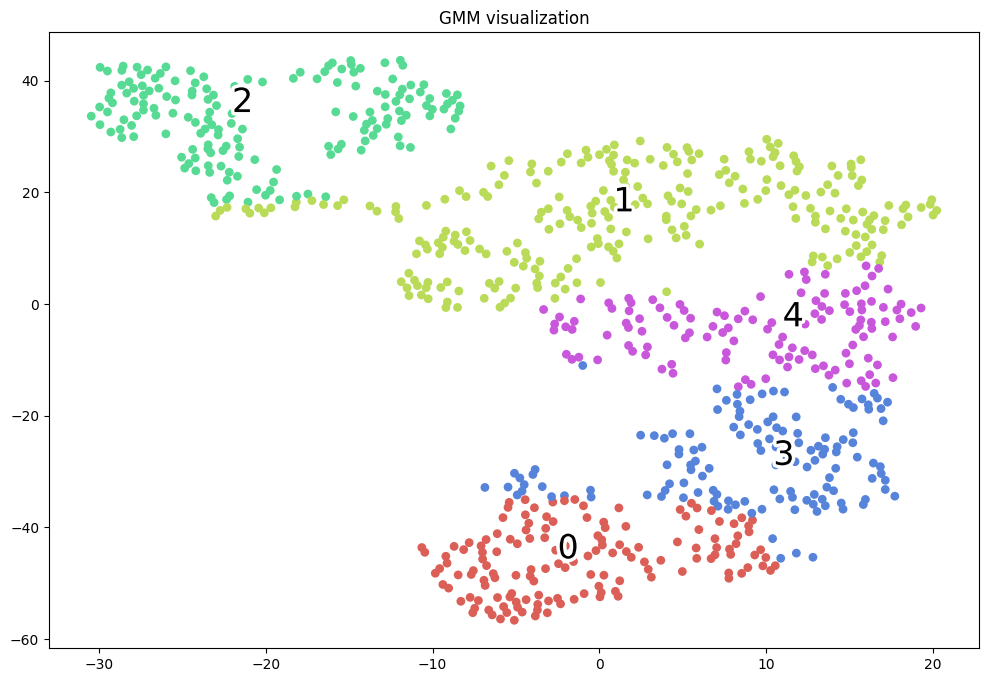

In [66]:
def _plot_gmm_scatter(X, labels):
    '''
    X: dữ liệu đầu vào
    labels: nhãn dự báo
    '''
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    # vẽ biểu đồ scatter
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sc = ax.scatter(X[:, 0], X[:, 1], lw=0, s=40, c=palette[labels.astype(np.int)])

    # thêm nhãn cho mỗi cluster
    txts = []
    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        xtext, ytext = np.median(X[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.title('GMM visualization')

# Gán nhãn các mã sản phẩm vào các nhóm cụm tương ứng
labels = gmm.predict(X_std)
data["cluster"] = labels

# Chuẩn bị dữ liệu và vẽ biểu đồ scatter
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_std)
_plot_gmm_scatter(X_embedded, labels)